# NNFL Research Paper Assignment 

#Akash Venkatesan 										2018A3PS1106P

#Shreyas Bhat Kera 										2018A7PS1119P

#N Harishchandra Prasad 									2018A3PS0422P

#Paper ID 												13

**Instructions and comments regarding code are given in text cells**


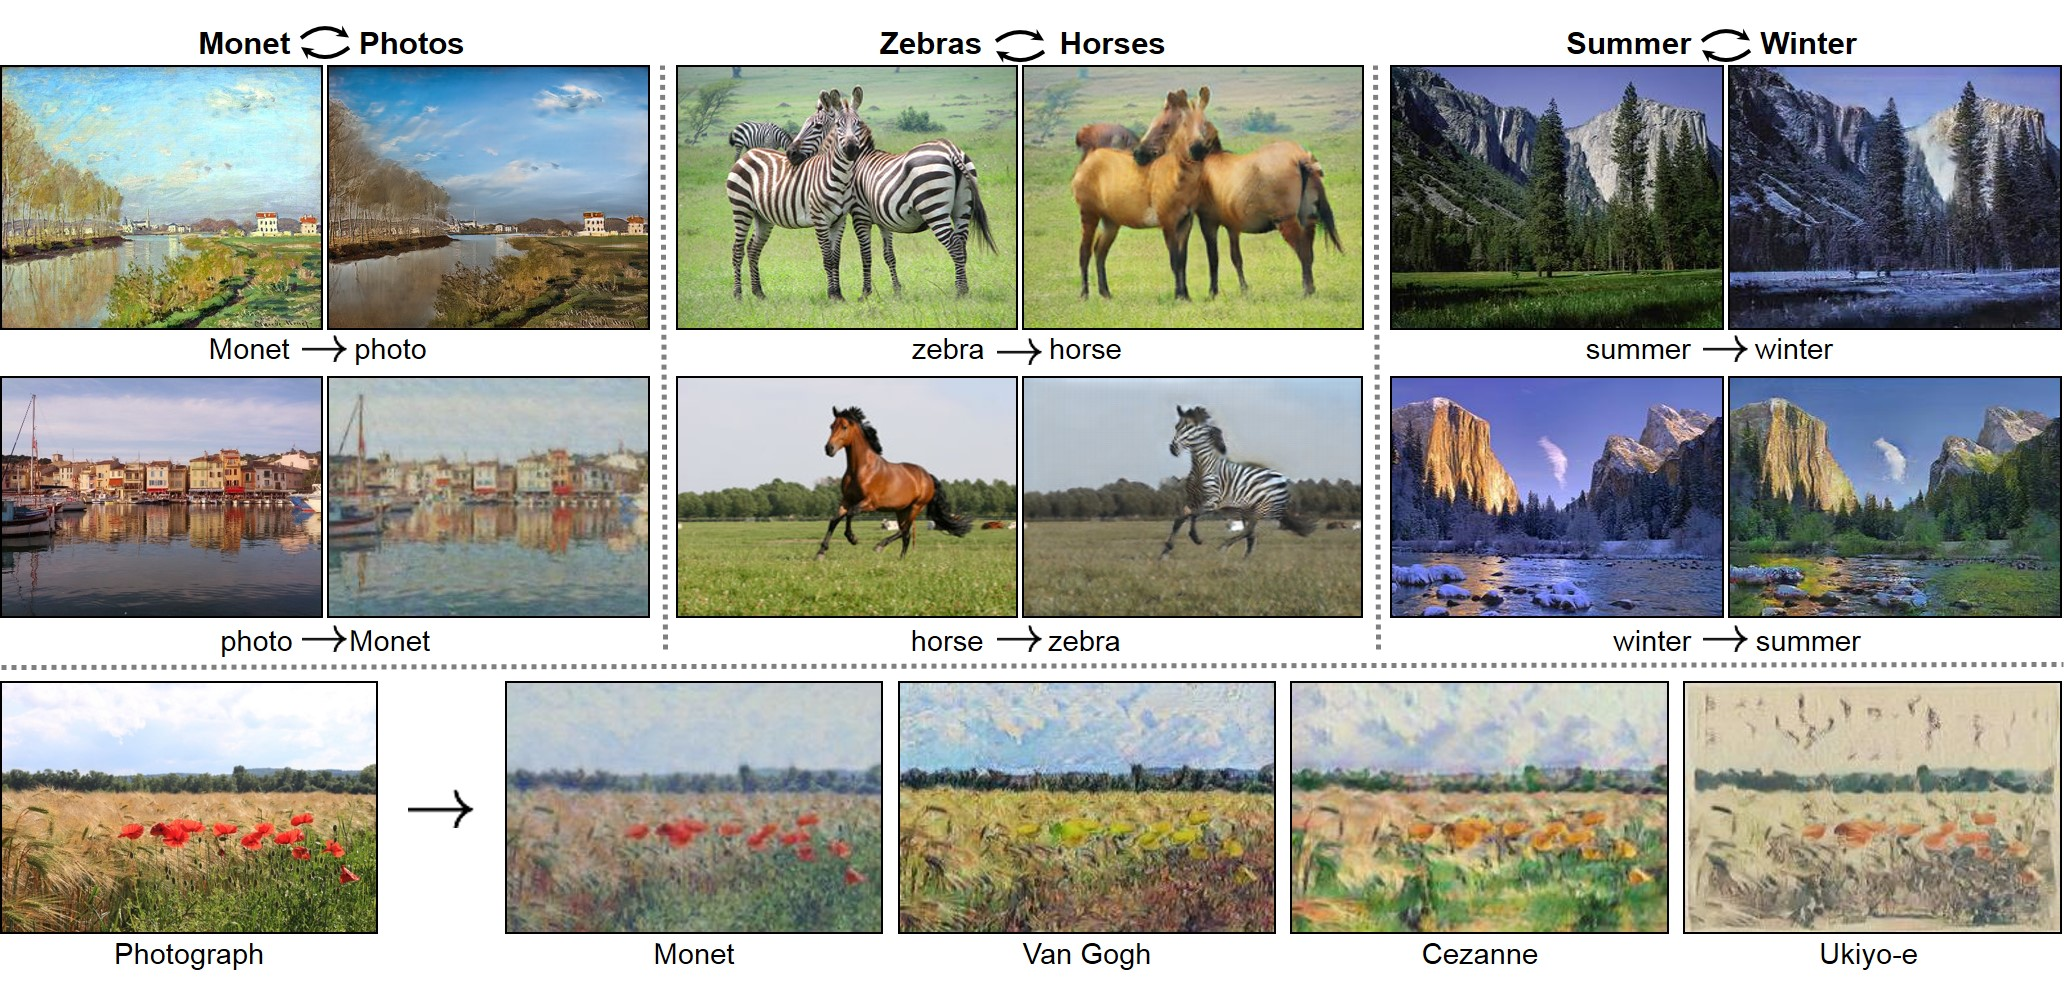

#Paper:

# Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial Networks

**Authors**
 - Jun-Yan Zhu, Taesung Park, Phillip Isola, Alexei A. Efros ( Berkeley AI Research (BAIR) laboratory, UC Berkeley )


#Explaination of the functions that are needed to train and test

## Note: only files and functions relevent to our assignment on CycleGAN are explained, i.e. for training and testing using the Van Gogh dataset

**train.py** - training script for image-to-image translation using CycleGAN.

The code can be understood by the following pseudocode:



```

1.   Create two generators G_A and G_B, as well as 2 discriminators D_A and D_B.
2.   For every epoch do:
      *   Update learning rate if required
      *   Collect a minibatch of samples from Domain X (Van Gogh Paintings) [batchsize was fixed at 1 for our trials]
      *   Collect a minibatch of samples from Domain Y (Real Life Images)
      *   Calculate the losses for generators G_A and G_B
      *   Calculate the identity loss
      *   Calculate forward and backward cycle losses
      *   Compute the gradients and update weights for the generators
      *   Calculate the losses for discriminators D_A and D_B 
      *   Compute the gradients and update weights for the discriminators.
```
------------------

**test.py** - testing script for image-to-image translation using CycleGAN.

The code can be understood by the following pseudocode:

```

1.   Load the saved generators G_A and G_B, as well as the saved discriminators D_A and D_B from the checkpoints directory.
2.   Set the model to evaluation mode
3.   For every image in the test set do: (test set in out assignment may be from Real Images, Cezanne paintings or Monet paintings)
      *   Feed the image as input to the desired generator (generator that transforms to Van Gogh style)
      *   Run inference using the model
      *   Save the resulting transformed images in the results directory

```


----------

**data directory - \_\_init\_\_.py**

create_dataset() - creates the dataset using the class *CustomDatasetDataLoader* (which is a Wrapper class of Dataset class that performs multi-threaded data loading)








--------------

**model directory - networks.py**

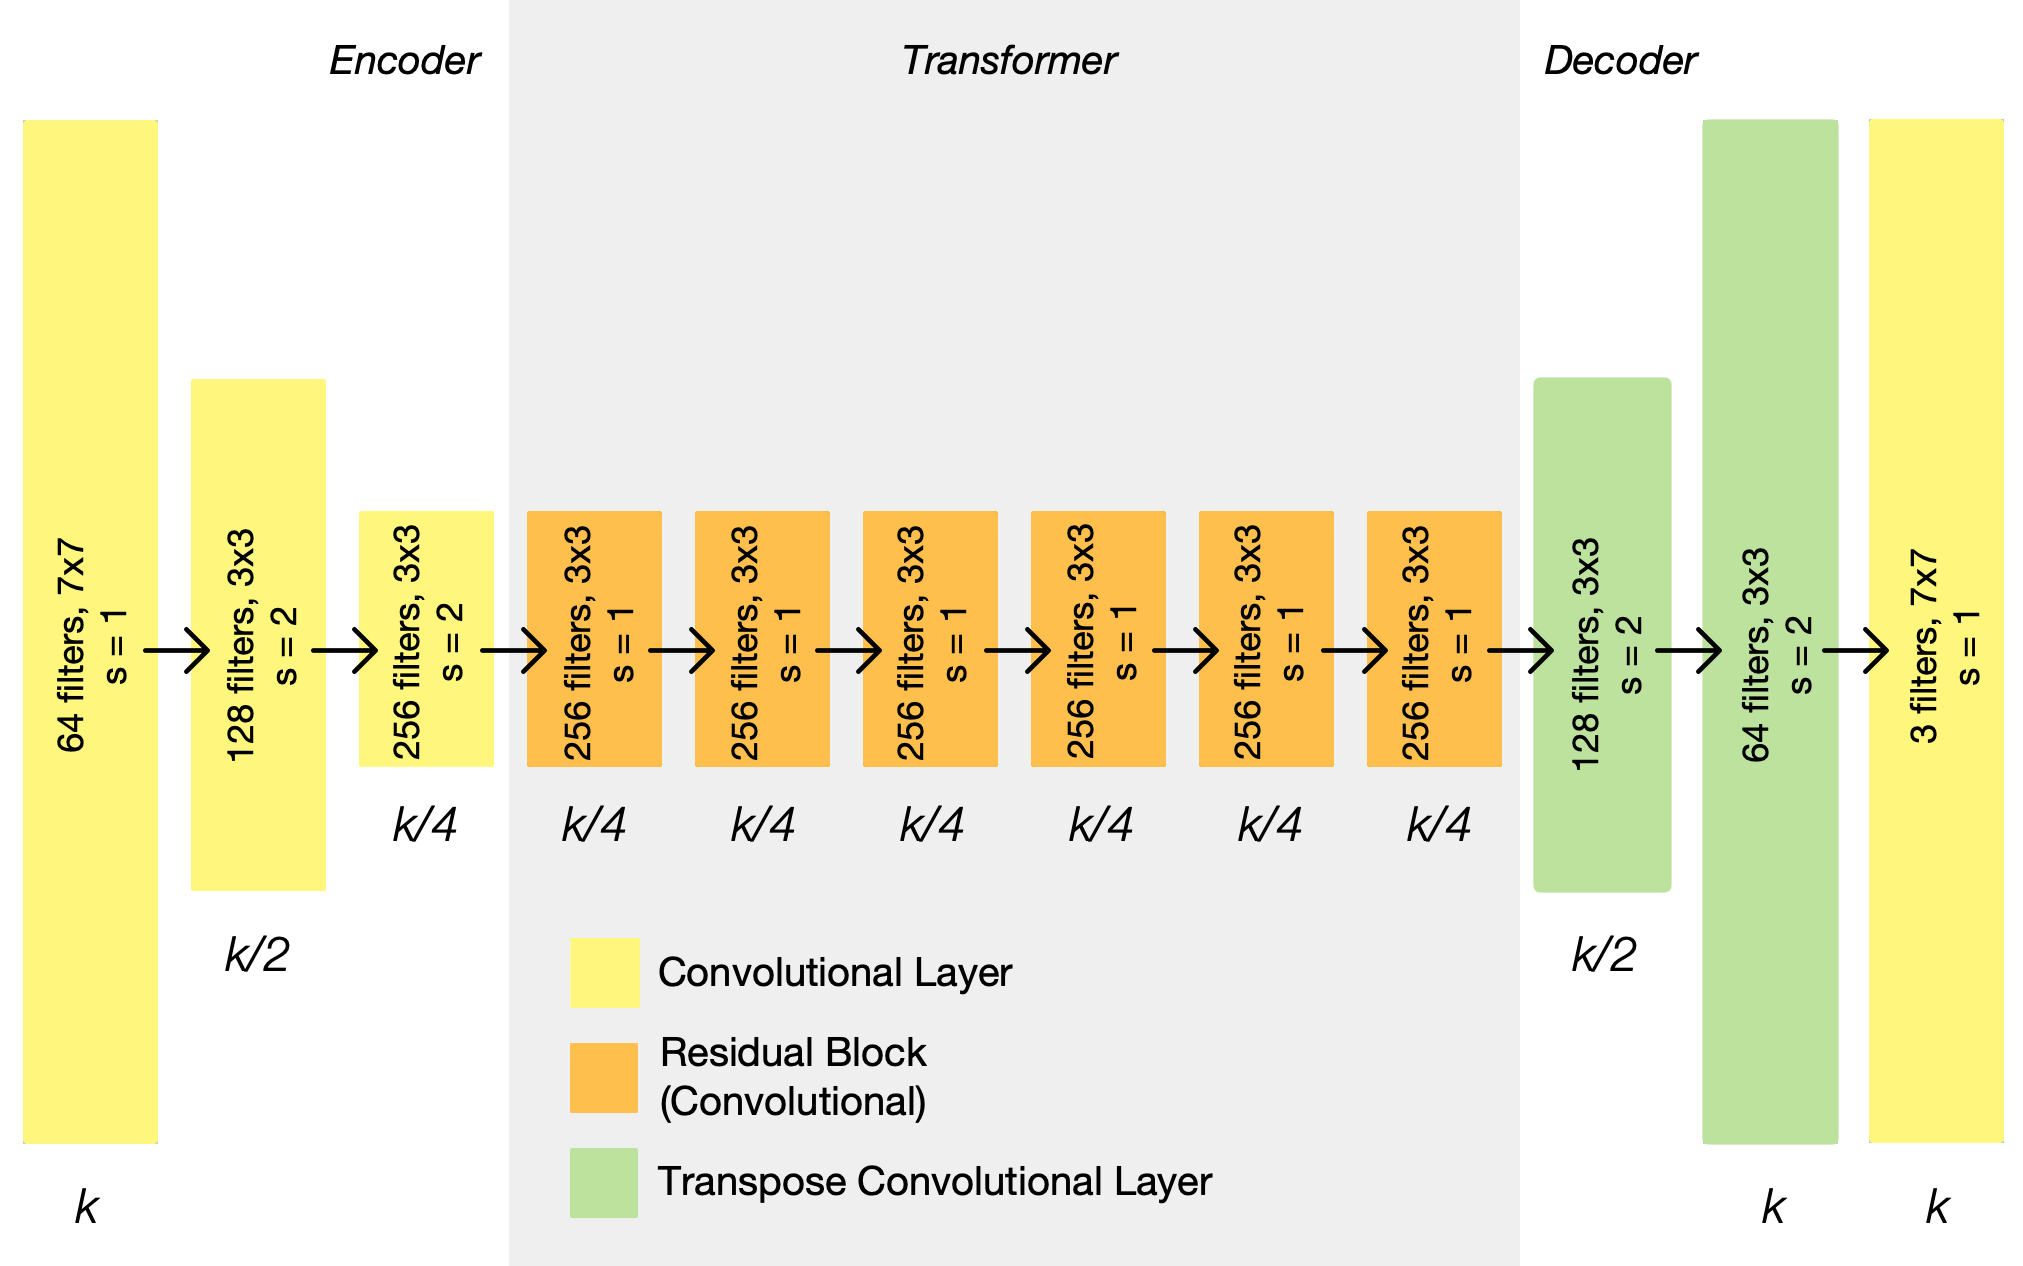

The generator network is similar to the 
image given, but with **9 residual blocks**.

The discriminator uses **70 x 70 PatchGANs**
 which aim to classify whether 70 × 70 
overlapping image patches are real or fake.
As stated earlier, there are 2 Discriminators and 2 Generators

We Assume **Domain A is Van Gogh paintings** and **Domain B is Real Life images**

Assume Generators: 

    G_A: A -> B
    G_B: B -> A

Assume Discriminators: 

    D_A: G_A(A) vs. B 
    D_B: G_B(B) vs. A


Methods needed for our CycleGAN:



define_G()
----
creates the generator as stated above

define_D()
----
creates the discriminator as stated above

get_norm_layer()
----
returns an instance norm layer as specified by the paper

get_scheduler()
----
retruns a learning rate scheduler according to the policy in the paper (constant at 0.0002 for 100 epochs, then linearly reduce to 0 over the next 100 epochs)

def init_weights()
----
initialize weights normally

def init_net()
----
allow the network to work with GPU and CUDA support

class GANLoss()
----
Train Generators to minimize `[(D_A(G_A(A)) − 1)^2 ] and [(D_B(G_B(B)) − 1)^2 ] `respectively, and train Discriminators to minimize `[(D_A(B) − 1)^2 ] + [D_A(G_A(A))^2 ] and [(D_B(A) − 1)^2 ] + [D_B(G_B(B))^2 ]` respectively.

class ResnetGenerator()
----
create the Resnet network needed for the generator, with 9 residual blocks, as reuired by the paper since input image sizes are 256x256

class NLayerDiscriminator()
----
Defines a 70x70 PatchGAN discriminator

---------------

**cycle_gan_model.py**

The losses for the architecture are as follows:


GAN Loss: specified in networks.py

Forward cycle loss:  `lambda_A * ||G_B(G_A(A)) - A||`

Backward cycle loss: `lambda_B * ||G_A(G_B(B)) - B||`

Identity loss: `lambda_identity * (||G_A(B) - B|| * lambda_B + ||G_B(A) - A|| * lambda_A)`

--------------------

**options directory**

**base_options.py** - contains configurations such as model architecture options, type of normalization (instance norm for cycleGAN), etc.

**train_options.py** - contains training options such as number of epochs, learning rate, display visualizations, etc.

**test_options.py** - contains testing options such as number of images to be tested, results directory, etc.

---------------------

**utils directory**

visualizer.py - includes several functions that can display/save images and print/save logging information.

# Step 1: Basic Installations and imports

 - Check if GPU is allocated and if so, which one

 - Note: for training purposes, a GPU with CUDA is necessary

In [ ]:
!nvidia-smi

Mon Nov 23 18:43:02 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

 - For colab, clone the base [repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix) written in pytorch for the paper

In [ ]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2337, done.
remote: Total 2337 (delta 0), reused 0 (delta 0), pack-reused 2337
Receiving objects: 100% (2337/2337), 8.09 MiB | 33.28 MiB/s, done.
Resolving deltas: 100% (1500/1500), done.


 - Change the current working directory and install the required package (torch,
torchvision, 
dominate, 
visdom)
 - Note: dominate and visdom are used for creating and manipulating HTML documents as well as visualizing training results and loss *graphs*

In [ ]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')
!pip install -r requirements.txt

     |████████████████████████████████| 686kB 12.2MB/s 
     |████████████████████████████████| 204kB 35.5MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-cp36-none-any.whl size=655251 sha256=f3ce6ab78135cdb434ac6a66ea3f9b579add2398727a383241b88be5e81c5517
  Stored in directory: /root/.cache/pip/wheels/70/19/a7/6d589ed967f4dfefd33bc166d081257bd4ed0cb618dccfd62a
  Created wheel for torchfile: filename=torchfile-0.1.0-cp36-none-any.whl size=5711 sha256=271ca275fffe3dcdfa8a2ee85cca9a0a4c0a58749cf81bbb09fe3d684a4f4dba
  Stored in directory: /root/.cache/pip/wheels/b1/c3/d6/9a1cc8f3a99a0fc1124cae20153f36af59a6e683daca0a0814
Successfully built visdom torchfile


# Step 2: Download Required Dataset

Our assignment invloves the Van Gogh dataset which can be downloaded from [datasets website](https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/) using the command
-   `bash ./datasets/download_cyclegan_dataset.sh vangogh2photo`

The file structure will be as follows:

-   Van Gogh Dataset folder under `/dataset`.
-   Subfolders `testA` - Van Gogh test images, `testB` - Real test images, `trainA` - Van Gogh train images, and `trainB` - Real test images under `/dataset` 

In [ ]:
!bash ./datasets/download_cyclegan_dataset.sh vangogh2photo

Streaming output truncated to the last 5000 lines.
  inflating: ./datasets/vangogh2photo/trainB/2016-08-26 19:25:29.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-02-20 16:54:25.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-05-19 19:43:44.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-10-26 21:18:58.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-07-19 15:39:53.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-06-13 21:21:54.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-06-04 14:10:33.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-06-18 12:46:34.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-03-17 18:07:22.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-01-24 17:24:29.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-01-27 12:45:41.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-06-14 05:57:28.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-12-24 01:48:36.jpg  
  inflating: ./datasets/va

# Optional: Step 3 - Pretrained models


- Make a checkpoint directory to save intermediate and final models as well as resulting example images

In [ ]:
!mkdir CP

**Option 1 - start from scratch**

For this option, do not download any of the pretrained weights, simply skip the next two options and start training

**Option 2 - Authors pretrained weights**

For this option, download weights from [pretrained weights website](http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models) which were trained on the full datasets, for 200 epochs

In [ ]:
!echo "Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower"
!echo "Specified [style_vangogh]"
!mkdir -p /content/pytorch-CycleGAN-and-pix2pix/CP/style_vangogh_pretrained
!wget -N http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/style_vangogh.pth -O /content/pytorch-CycleGAN-and-pix2pix/CP/style_vangogh_pretrained/latest_net_G.pth

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [style_vangogh]
for details.

--2020-11-23 18:43:23--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/style_vangogh.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.189.73
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.189.73|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘/content/pytorch-CycleGAN-and-pix2pix/CP/style_vangogh_pretrained/latest_net_G.pth’

/content/pytorch-Cy 100%[===================>]  43.46M  63.2MB/s    in 0.7s    

2020-11-23 18:43:24 (63.2 MB/s) - ‘/content/pytorch-CycleGAN-and-pix2pix/CP/style_vangogh_pr

**Option 3 - use pretrained weights obtained for this assignement**

For this option download weights from [drive](https://drive.google.com/drive/folders/1h9ZGkrj5Hko4MyniTpyXe2nR6i04oQ4l?usp=sharing). These weights were trained by us on a subset of the Van Gogh dataset (using 400 Real images) for 200 epochs. First a new folder is made, then 4 weight files are downloaded for:
- Generator A: converts Van Gogh to Real
- Generator B: converts Real to Van Gogh (object of this assignement)
- Discriminator A: Discriminates between Real images and images generated by Generator A
- Discriminator B: Discriminates between Van Gogh images and images generated by Generator B

In [ ]:
%cd /content/pytorch-CycleGAN-and-pix2pix/CP
!mkdir style_vangogh_pretrained
%cd /content/pytorch-CycleGAN-and-pix2pix/CP/style_vangogh_pretrained
!gdown --id 1P6mmn8eQakf5o1mexvrn1_vuOLIrlKVt
%cd /content/pytorch-CycleGAN-and-pix2pix/CP/style_vangogh_pretrained
!gdown --id 1fRcdMeP2AkVfghpn_lAKOdUkUVvSA9lH
%cd /content/pytorch-CycleGAN-and-pix2pix/CP/style_vangogh_pretrained
!gdown --id 1i_8uNnPYMtVewzR0dzXktCQIsqU897jb
%cd /content/pytorch-CycleGAN-and-pix2pix/CP/style_vangogh_pretrained
!gdown --id 11GHhHUviYUtXqCvTEhQX2DRZPEckRzSA

/content/pytorch-CycleGAN-and-pix2pix/CP
mkdir: cannot create directory ‘style_vangogh_pretrained’: File exists
/content/pytorch-CycleGAN-and-pix2pix/CP/style_vangogh_pretrained
Downloading...
From: https://drive.google.com/uc?id=1P6mmn8eQakf5o1mexvrn1_vuOLIrlKVt
To: /content/pytorch-CycleGAN-and-pix2pix/CP/style_vangogh_pretrained/latest_net_G_B.pth
45.5MB [00:00, 59.5MB/s]
/content/pytorch-CycleGAN-and-pix2pix/CP/style_vangogh_pretrained
Downloading...
From: https://drive.google.com/uc?id=1fRcdMeP2AkVfghpn_lAKOdUkUVvSA9lH
To: /content/pytorch-CycleGAN-and-pix2pix/CP/style_vangogh_pretrained/latest_net_G_A.pth
45.5MB [00:00, 68.5MB/s]
/content/pytorch-CycleGAN-and-pix2pix/CP/style_vangogh_pretrained
Downloading...
From: https://drive.google.com/uc?id=1i_8uNnPYMtVewzR0dzXktCQIsqU897jb
To: /content/pytorch-CycleGAN-and-pix2pix/CP/style_vangogh_pretrained/latest_net_D_A.pth
11.1MB [00:00, 92.0MB/s]
/content/pytorch-CycleGAN-and-pix2pix/CP/style_vangogh_pretrained
Downloading...
From: htt

# Step 4 - Training


Note: The following cell is only used for colab to tunnel to a localhost, since colab does not support visdom normally

In [ ]:
#@title Localhost for visdom in colab{display-mode: "form"}
# ! npm install -g localtunnel
# get_ipython().system_raw('python3 -m pip install visdom')
# get_ipython().system_raw('python3 -m visdom.server -port 8097 >> visdomlog.txt 2>&1 &')
# get_ipython().system_raw('lt --port 8097 >> url.txt 2>&1 &')
# import time
# time.sleep(5)
# ! cat url.txt
# import visdom
# time.sleep(5)
# vis = visdom.Visdom(port='8097')
# print(vis)
# time.sleep(3)
# vis.text('testing')
# ! cat visdomlog.txt

-   The base command to train is `python train.py --dataroot ./datasets/vangogh2photo --name style_vangogh_pretrained --model cycle_gan --max_dataset_size 400 --checkpoints_dir /content/pytorch-CycleGAN-and-pix2pix/CP`

We fix max dataset size to 400 to speed up training

Generally, each epoch will take 2-3 minutes, equating to roughly 7 - 10 hours of total training time.

Additional training options for visualizing results, changing model architecture can be found in the options folder

Training loss graph and visual resuts can be seen using visdom on localhost

Our loss graph:


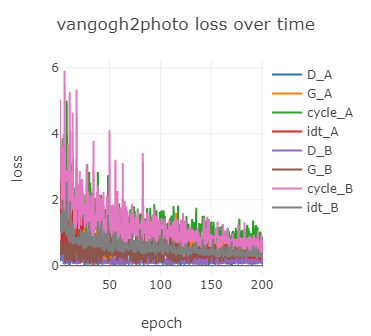

In [ ]:
%cd /content/pytorch-CycleGAN-and-pix2pix
!python train.py --dataroot ./datasets/vangogh2photo --name style_vangogh_pretrained --model cycle_gan --save_epoch_freq 10 --display_freq 100 --max_dataset_size 400 --checkpoints_dir /content/pytorch-CycleGAN-and-pix2pix/CP

/content/pytorch-CycleGAN-and-pix2pix
----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: /content/pytorch-CycleGAN-and-pix2pix/CP	[default: ./checkpoints]
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/vangogh2photo      	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 100                           	[default: 400]
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256            

# Step 5: Testing

-   The base command is `python test.py --dataroot datasets/vangogh2photo/testB --name style_vangogh_pretrained --model test --no_dropout --checkpoints_dir /content/pytorch-CycleGAN-and-pix2pix/CP`

Visual results will be saved under the corresponding directory in the results folder

#Real to Van Gogh

In [ ]:
%cd /content/pytorch-CycleGAN-and-pix2pix
!python test.py --dataroot datasets/vangogh2photo/testB --name style_vangogh_pretrained --model test --no_dropout --checkpoints_dir /content/pytorch-CycleGAN-and-pix2pix/CP

/content/pytorch-CycleGAN-and-pix2pix
----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: /content/pytorch-CycleGAN-and-pix2pix/CP	[default: ./checkpoints]
                crop_size: 256                           
                 dataroot: datasets/vangogh2photo/testB  	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         

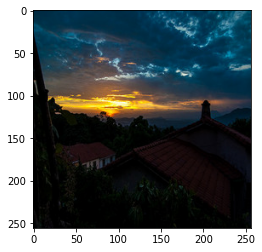

In [ ]:
#original
import matplotlib.pyplot as plt
path = '/content/pytorch-CycleGAN-and-pix2pix/results/style_vangogh_pretrained/test_latest/images/2014-08-11 22:29:46_real.png'
img = plt.imread(path)
plt.imshow(img)

Example


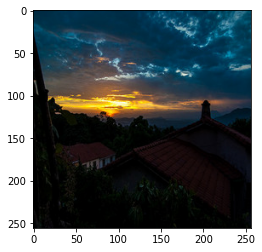

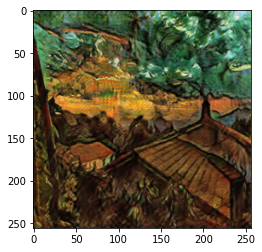

In [ ]:
#transformed
import matplotlib.pyplot as plt
img = plt.imread(path[:-8]+'fake.png')
plt.imshow(img)

Example

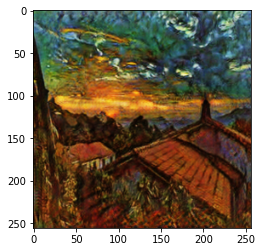

#CEZANNE to VAN GOGH


**Download Cezanne dataset**

In [ ]:
!bash ./datasets/download_cyclegan_dataset.sh cezanne2photo

Streaming output truncated to the last 5000 lines.
  inflating: ./datasets/cezanne2photo/trainB/2015-12-06 01:59:08.jpg  
  inflating: ./datasets/cezanne2photo/trainB/2014-02-16 14:10:03.jpg  
  inflating: ./datasets/cezanne2photo/trainB/2014-05-15 17:36:22.jpg  
  inflating: ./datasets/cezanne2photo/trainB/2016-12-14 13:22:01.jpg  
  inflating: ./datasets/cezanne2photo/trainB/2015-01-09 13:20:23.jpg  
  inflating: ./datasets/cezanne2photo/trainB/2016-03-15 09:53:29.jpg  
  inflating: ./datasets/cezanne2photo/trainB/2016-02-27 18:44:59.jpg  
  inflating: ./datasets/cezanne2photo/trainB/2015-06-16 14:35:04.jpg  
  inflating: ./datasets/cezanne2photo/trainB/2014-04-16 21:51:08.jpg  
  inflating: ./datasets/cezanne2photo/trainB/2014-02-22 16:19:21.jpg  
  inflating: ./datasets/cezanne2photo/trainB/2015-09-23 05:26:28.jpg  
  inflating: ./datasets/cezanne2photo/trainB/2016-02-23 16:41:42.jpg  
  inflating: ./datasets/cezanne2photo/trainB/2016-06-23 10:54:40.jpg  
  inflating: ./datasets/ce

In [ ]:
!python test.py --dataroot datasets/cezanne2photo/testA --name style_vangogh_pretrained --model test --no_dropout --checkpoints_dir /content/pytorch-CycleGAN-and-pix2pix/CP

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: /content/pytorch-CycleGAN-and-pix2pix/CP	[default: ./checkpoints]
                crop_size: 256                           
                 dataroot: datasets/cezanne2photo/testA  	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_

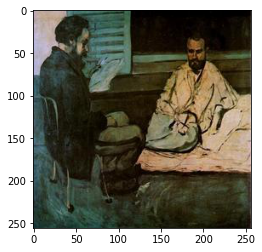

In [ ]:
#original
path = '/content/pytorch-CycleGAN-and-pix2pix/results/style_vangogh_pretrained/test_latest/images/00310_real.png'
import matplotlib.pyplot as plt
img = plt.imread(path)
plt.imshow(img)

Example

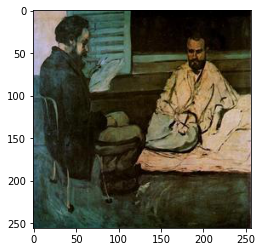

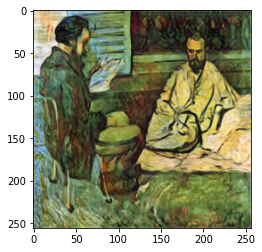

In [ ]:
#transformed
img = plt.imread(path[:-8]+'fake.png')
plt.imshow(img)

Example

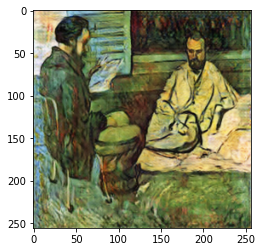

#MONET to VAN GOGH


**Download Monet dataset**

In [ ]:
!bash ./datasets/download_cyclegan_dataset.sh monet2photo

Streaming output truncated to the last 5000 lines.
  inflating: ./datasets/monet2photo/trainB/2016-03-31 05:58:36.jpg  
  inflating: ./datasets/monet2photo/trainB/2014-01-10 12:46:39.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-02-23 11:45:00.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-05-23 09:38:08.jpg  
  inflating: ./datasets/monet2photo/trainB/2016-01-15 00:48:49.jpg  
  inflating: ./datasets/monet2photo/trainB/2016-12-27 18:15:26.jpg  
  inflating: ./datasets/monet2photo/trainB/2017-01-02 11:16:05.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-08-06 11:08:32.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-12-16 07:43:36.jpg  
  inflating: ./datasets/monet2photo/trainB/2016-03-25 12:57:28.jpg  
  inflating: ./datasets/monet2photo/trainB/2016-05-10 11:44:44.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-03-11 08:01:52.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-08-30 05:26:05.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-10-0

In [ ]:
!python test.py --dataroot datasets/monet2photo/testA --name style_vangogh_pretrained --model test --no_dropout --checkpoints_dir /content/pytorch-CycleGAN-and-pix2pix/CP

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: /content/pytorch-CycleGAN-and-pix2pix/CP	[default: ./checkpoints]
                crop_size: 256                           
                 dataroot: datasets/monet2photo/testA    	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_

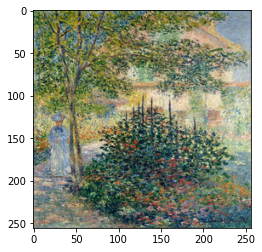

In [ ]:
#original
path = '/content/pytorch-CycleGAN-and-pix2pix/results/style_vangogh_pretrained/test_latest/images/00100_real.png'
img = plt.imread(path)
plt.imshow(img)

Example

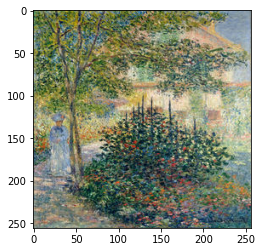

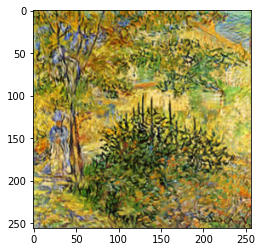

In [ ]:
#transformed
img = plt.imread(path[:-8]+'fake.png')
plt.imshow(img)

Example

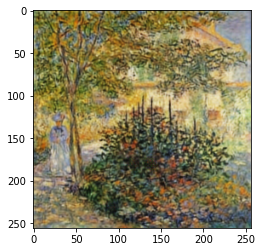

#More visual results can be seen in the PPT